# K-Nearest Neighbours

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

import helper

In [3]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


In [4]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [5]:

y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp(y_pred)))

print(f'{rmse = :.2f}') 


rmse = 90170181.22


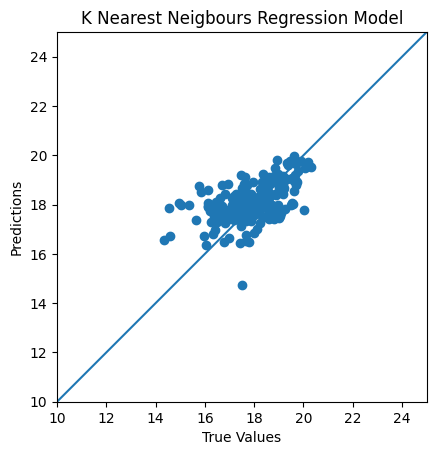

In [6]:
plt.scatter(y_test, y_pred)
plt.title('K Nearest Neigbours Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])

In [7]:
ratio = helper.revenue_exp(y_test) / helper.revenue_exp(y_pred)
print(ratio.describe())


for i in range(10,20):
    print(f'{y_test.iloc[i]:.2f} -> {y_pred[i]:.2f} -> {ratio.iloc[i]:.2f}')

count    2.060000e+02
mean     1.303972e+00
std      1.541223e+00
min      1.582920e-07
25%      4.687553e-01
50%      9.395194e-01
75%      1.533506e+00
max      1.584282e+01
Name: revenue, dtype: float64
18.17 -> 18.16 -> 1.01
20.07 -> 19.50 -> 1.78
18.51 -> 18.17 -> 1.41
18.38 -> 18.02 -> 1.42
16.70 -> 17.92 -> 0.29
16.04 -> 16.36 -> 0.73
17.27 -> 17.71 -> 0.65
17.49 -> 17.14 -> 1.41
17.88 -> 17.91 -> 0.97
17.21 -> 17.89 -> 0.50
